# **MODELO k-NN**

In [5]:
import pandas as pd
data=pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
#Renombrando a las columnas
columnas=['preg','glu','pres','skin','test','mass','pedi','age','class']
data=pd.read_csv('diabetes.csv',names=columnas)
data=data.drop(0)
data

,preg,glu,pres,skin,test,mass,pedi,age,class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#Tipo de dato y cantidad
print(data.shape)
data.dtypes

(768, 9)


preg     object
glu      object
pres     object
skin     object
test     object
mass     object
pedi     object
age      object
class    object
dtype: object

In [9]:
# Cambiamos el tipo de datos con astypes()
v_numericas=['preg','glu','pres','skin','test','mass','pedi','age']
data[v_numericas]=data[v_numericas].astype(float)

In [10]:
data.dtypes

preg     float64
glu      float64
pres     float64
skin     float64
test     float64
mass     float64
pedi     float64
age      float64
class     object
dtype: object

In [17]:
# Hallamos estadísticos descriptivos
from pandas import set_option
set_option('display.width',90) #ancho de pantalla
set_option('display.precision',2)#precision de 2 decimales
print(data.describe())

         preg     glu    pres    skin    test    mass    pedi     age
count  768.00  768.00  768.00  768.00  768.00  768.00  768.00  768.00
mean     3.85  120.89   69.11   20.54   79.80   31.99    0.47   33.24
std      3.37   31.97   19.36   15.95  115.24    7.88    0.33   11.76
min      0.00    0.00    0.00    0.00    0.00    0.00    0.08   21.00
25%      1.00   99.00   62.00    0.00    0.00   27.30    0.24   24.00
50%      3.00  117.00   72.00   23.00   30.50   32.00    0.37   29.00
75%      6.00  140.25   80.00   32.00  127.25   36.60    0.63   41.00
max     17.00  199.00  122.00   99.00  846.00   67.10    2.42   81.00


In [18]:
data.isnull().sum()

preg     0
glu      0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [20]:
#Matriz de correlación
correlaciones=data.corr(method='pearson')
print(correlaciones,'\n')
#no hay corelacion muy marcado por ende no se eliminan variables"

       preg   glu  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
glu    0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00 



In [21]:
#para hallar sesgo
print(data.skew())

preg      0.9
glu      0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: object


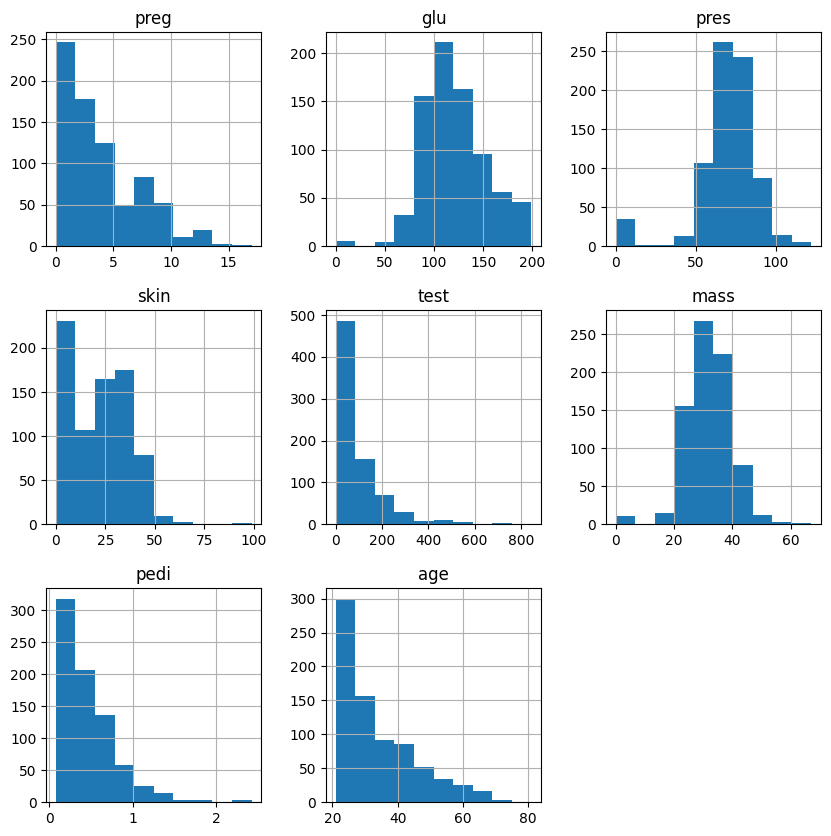

In [22]:
# Gráficos de histogramas
import matplotlib.pyplot as plt
data.hist(figsize=(10,10))
plt.show()

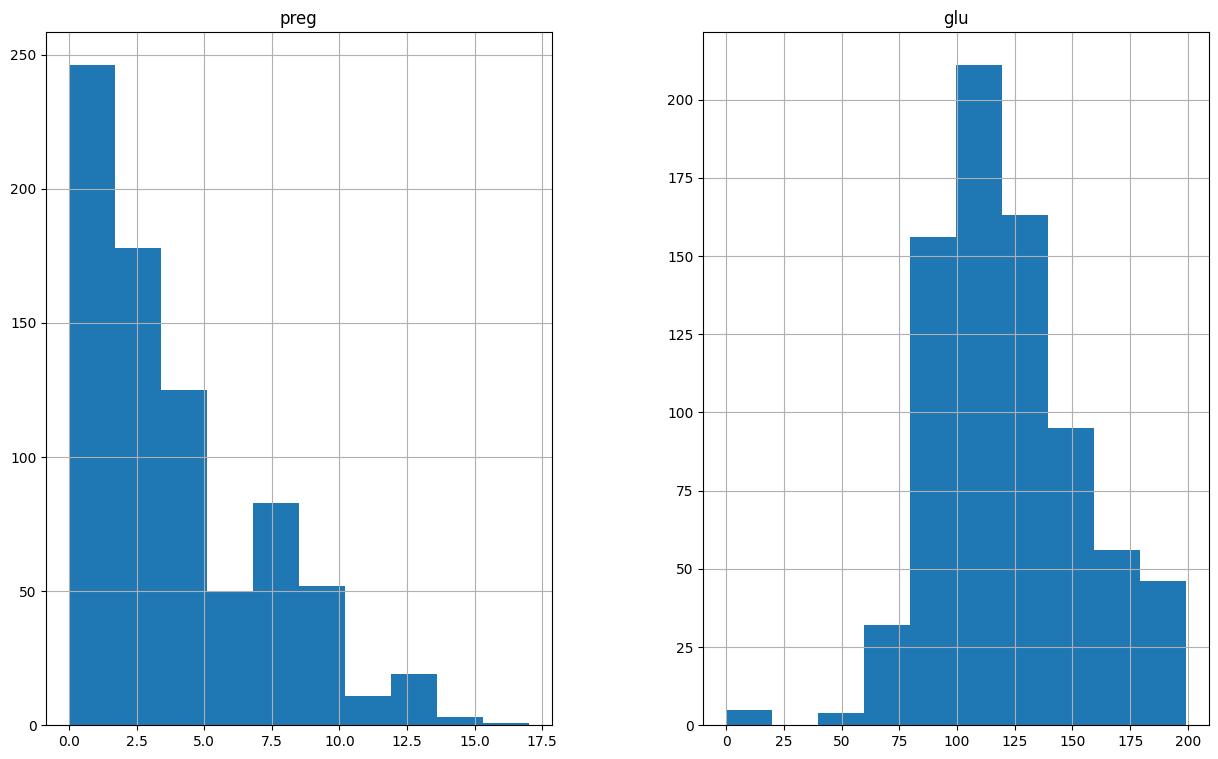

In [23]:
import matplotlib.pyplot as plt
data[['preg','glu']].hist(figsize=(15,9))
plt.show()

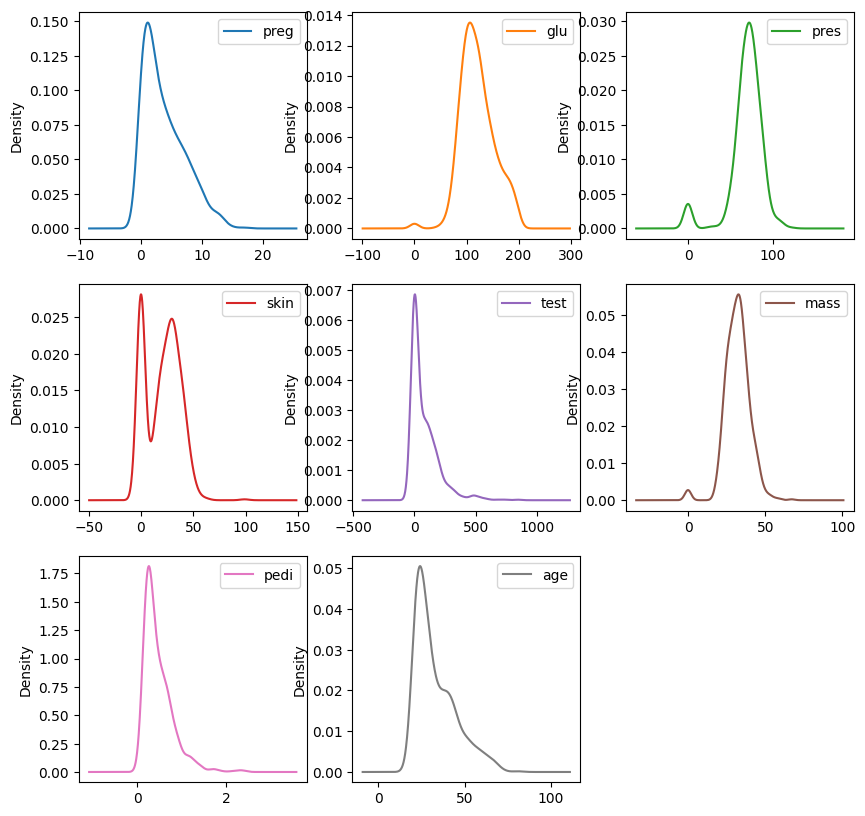

In [24]:
# Gráficos de densidad
data.plot(kind='density',subplots=True,layout=(3,3),sharex=False,figsize=(10,10))
plt.show()


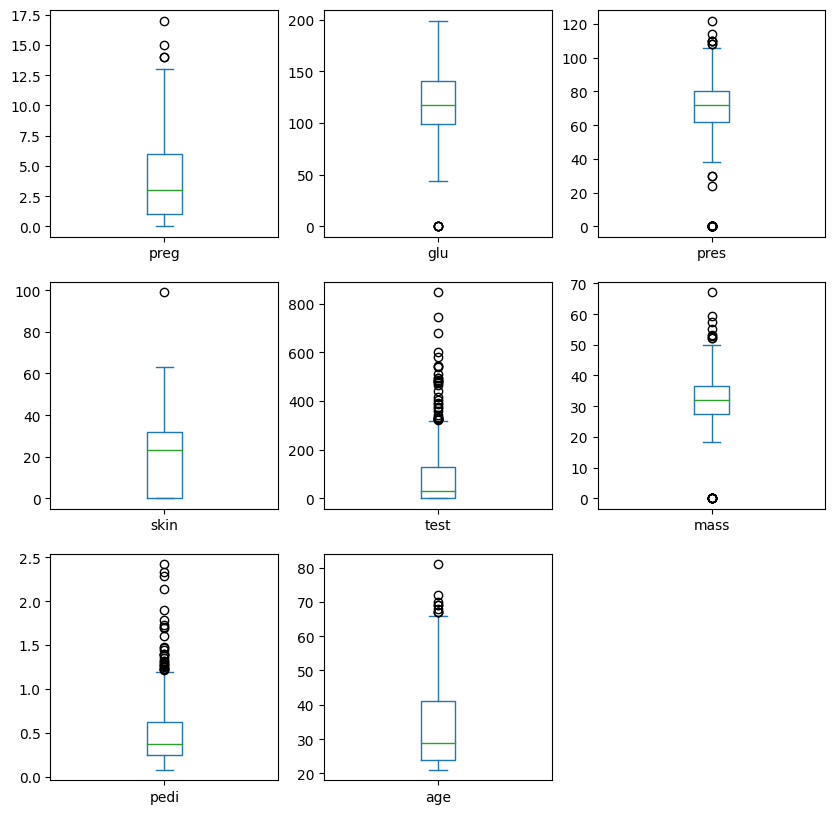

In [25]:
# Gráficos de cajas. Visualizar atípicos
data.plot(kind='box',subplots=True,layout=(3,3),sharex=False,figsize=(10,10))
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:97: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


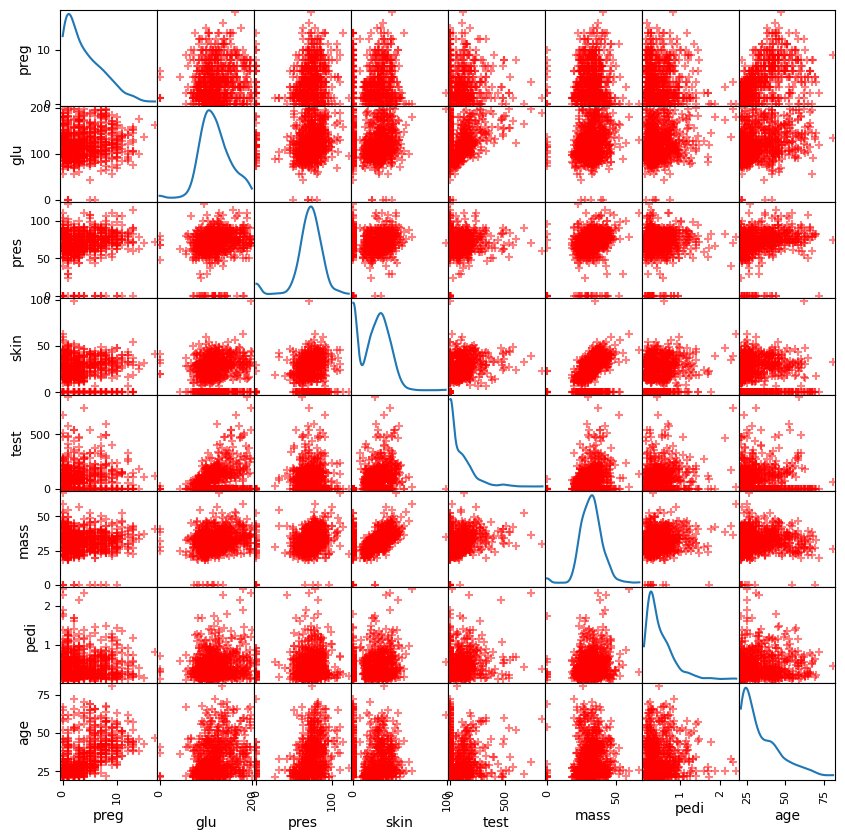

In [26]:
# Gráficos de dispersión
from pandas.plotting import scatter_matrix #matriz de dispersion
scatter_matrix(data,figsize=(10,10),color='red',diagonal='kde',marker='+') #kde es gráfico de densidad
plt.show()

In [27]:
import numpy as np
import csv
with open('diabetes.csv','r',) as file:  #'r'es lectura
    reader=csv.reader(file,delimiter=',')
    cabecera=next(reader)
    data1=list(reader)
    data1=np.array(data1).astype(float)
print(data1.shape)
print(cabecera)
data1

(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

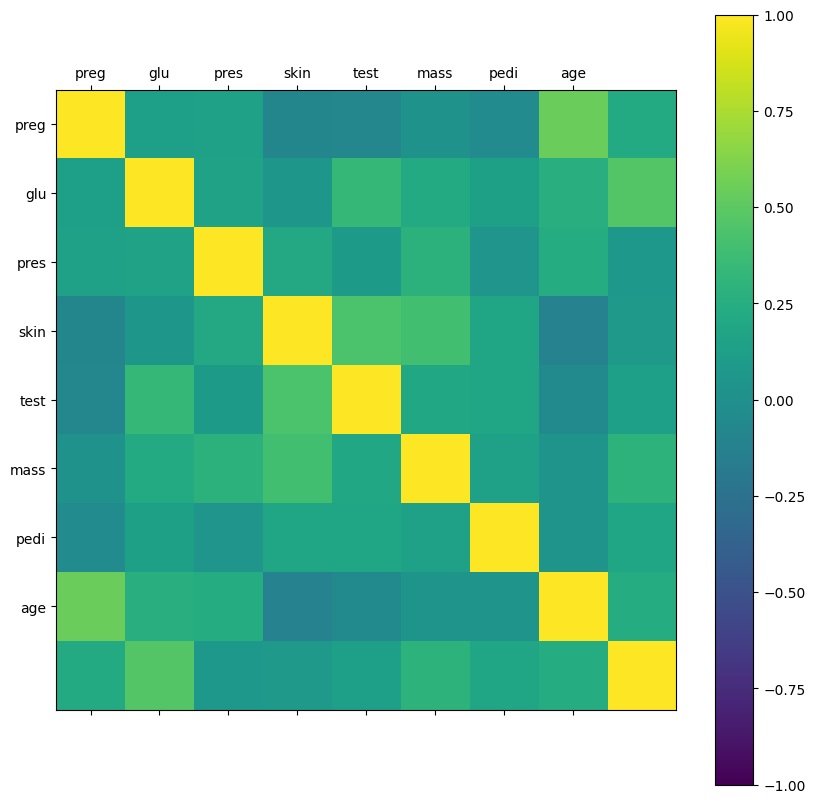

In [28]:
# Mapa de calor
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
cax=ax.matshow(correlaciones,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(v_numericas) # dentro de los ejes colocamos los nombres
ax.set_yticklabels(v_numericas)
plt.show()


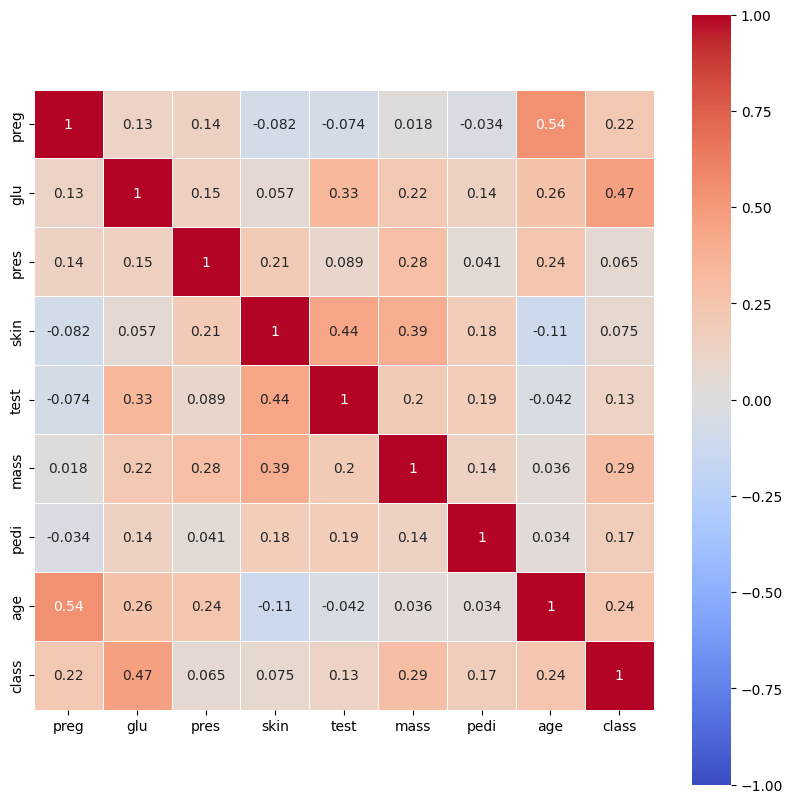

In [29]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correlaciones,cmap='coolwarm',vmin=-1,vmax=1,
           linewidths=.5,square=True,annot=True)
plt.show()

class
0    500
1    268
Name: count, dtype: int64


<ipython-input-31-8055a4f3b802>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class',data=data,palette='hls')


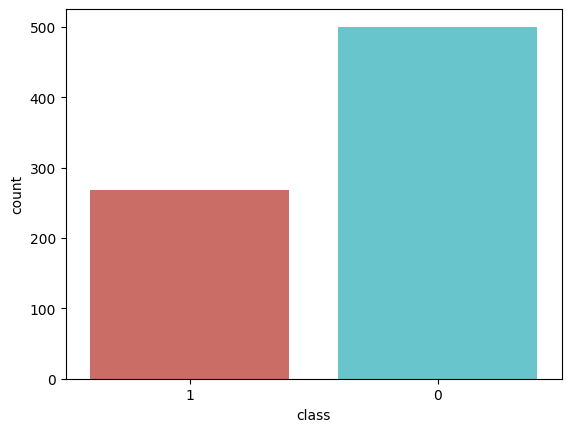

In [31]:
# Cantidad de datos por categoría
print(data['class'].value_counts())
sns.countplot(x='class',data=data,palette='hls')
plt.show()

In [33]:
# Separando los datos de entrenamiento 80% y prueba 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(
data[v_numericas],data['class'],test_size=0.2,random_state=0)
X_train, y_train

(     preg    glu  pres  skin   test  mass  pedi   age
 604   7.0  150.0  78.0  29.0  126.0  35.2  0.69  54.0
 119   4.0   97.0  60.0  23.0    0.0  28.2  0.44  22.0
 248   0.0  165.0  90.0  33.0  680.0  52.3  0.43  23.0
 158   1.0  109.0  56.0  21.0  135.0  25.2  0.83  23.0
 469   8.0  120.0   0.0   0.0    0.0  30.0  0.18  38.0
 ..    ...    ...   ...   ...    ...   ...   ...   ...
 764  10.0  101.0  76.0  48.0  180.0  32.9  0.17  63.0
 193   7.0  159.0  66.0   0.0    0.0  30.4  0.38  36.0
 630   4.0   94.0  65.0  22.0    0.0  24.7  0.15  21.0
 560  11.0   85.0  74.0   0.0    0.0  30.1  0.30  35.0
 685   5.0  136.0  82.0   0.0    0.0   0.0  0.64  69.0
 
 [614 rows x 8 columns],
 604    1
 119    0
 248    0
 158    0
 469    1
       ..
 764    0
 193    1
 630    0
 560    0
 685    0
 Name: class, Length: 614, dtype: object)

In [34]:
# Modelo k-NN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [35]:
# Hacemos predicciones
y_pred=knn.predict(X_test)
print('Valores predichos de prueba:\n {}'.format(y_pred))


Valores predichos de prueba:
 ['1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0'
 '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [38]:
#Medimos la precisión de nuestro modelo de entrenamiento y para la prueba
print('Precisión para los datos de entrenamiento:{:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión para los datos de prueba:{:.2f}'.format(knn.score(X_test, y_test)))

Precisión para los datos de entrenamiento:0.83
Precisión para los datos de prueba:0.71


In [39]:
print('Precisión para los datos de prueba:'
     ,knn.score(X_test, y_test)*100,"%")

Precisión para los datos de prueba: 71.42857142857143 %
